In [65]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import numpy as np 

In [66]:
Ticker = 'EURMAD=X'
start = '2023-01-31'
end= '2024-01-31'

In [67]:
df= yf.download(Ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [68]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31,10.7301,10.7301,10.7240,10.7301,10.7301,0
2023-02-01,10.7240,10.7428,10.7240,10.7240,10.7240,0
2023-02-02,10.7428,10.7927,10.7428,10.7428,10.7428,0
2023-02-03,10.7927,10.7927,10.7670,10.7927,10.7927,0
2023-02-06,10.7670,10.7670,10.6964,10.7670,10.7670,0
...,...,...,...,...,...,...
2024-01-15,10.5668,10.5668,10.5565,10.5668,10.5668,0
2024-01-16,10.5565,10.5565,10.5294,10.5565,10.5565,0
2024-01-17,10.5294,10.5294,10.5260,10.5294,10.5294,0


In [69]:
# add more featues
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Adj Close'] - df['Open']
df['3day MA'] = df['Adj Close'].shift(1).rolling(window=3).mean()
df['10day MA'] = df['Adj Close'].shift(1).rolling(window=10).mean()
df['30day MA'] = df['Adj Close'].shift(1).rolling(window=30).mean()
df['Std_dev'] = df['Adj Close'].rolling(5).std()

In [70]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.0,254.000000,254.000000,251.000000,244.000000,224.000000,250.000000
mean,10.606616,10.625508,10.586965,10.606442,10.606442,0.0,0.038543,-0.000174,10.606651,10.605628,10.603261,0.044415
std,0.116884,0.108613,0.119637,0.115503,0.115503,0.0,0.040007,0.021873,0.109863,0.102853,0.094909,0.019385
min,10.282900,10.332400,10.282900,10.282900,10.282900,0.0,0.000000,-0.110200,10.324067,10.382520,10.436713,0.009801
25%,10.534700,10.550800,10.511850,10.535000,10.535000,0.0,0.007600,0.000000,10.537617,10.537770,10.533588,0.030170
50%,10.606200,10.619000,10.581250,10.604350,10.604350,0.0,0.027200,0.000000,10.595067,10.606275,10.591518,0.043844
75%,10.690700,10.710750,10.679925,10.690700,10.690700,0.0,0.056274,0.000000,10.695850,10.692007,10.693108,0.054059
max,10.887300,10.887300,10.887300,10.887300,10.887300,0.0,0.175800,0.147500,10.840533,10.799800,10.773207,0.110461


In [71]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', 'O-C',
       '3day MA', '10day MA', '30day MA', 'Std_dev'],
      dtype='object')

In [72]:
df.isnull().sum() 

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
H-L           0
O-C           0
3day MA       3
10day MA     10
30day MA     30
Std_dev       4
dtype: int64

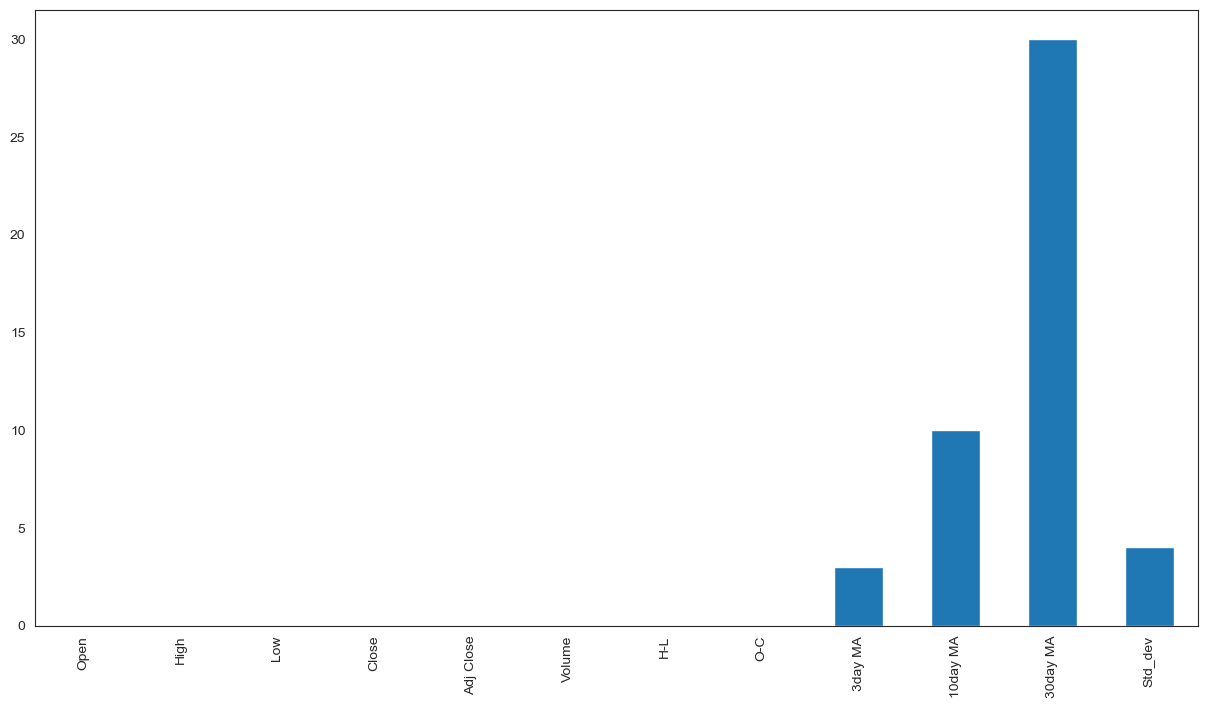

In [73]:
df_missing_count = df.isnull().sum() # Values of -1 is missing data
plt.rcParams['figure.figsize'] = (15,8)
df_missing_count.plot.bar()
plt.show()

In [74]:
for column in df:
    print("{0:15} {1:6d} {2:6}".format(column, df[column].nunique(), (df[column] == -1).sum()))

Open               227      0
High               180      0
Low                179      0
Close              238      0
Adj Close          238      0
Volume               1      0
H-L                202      0
O-C                 31      0
3day MA            247      0
10day MA           243      0
30day MA           224      0
Std_dev            250      0


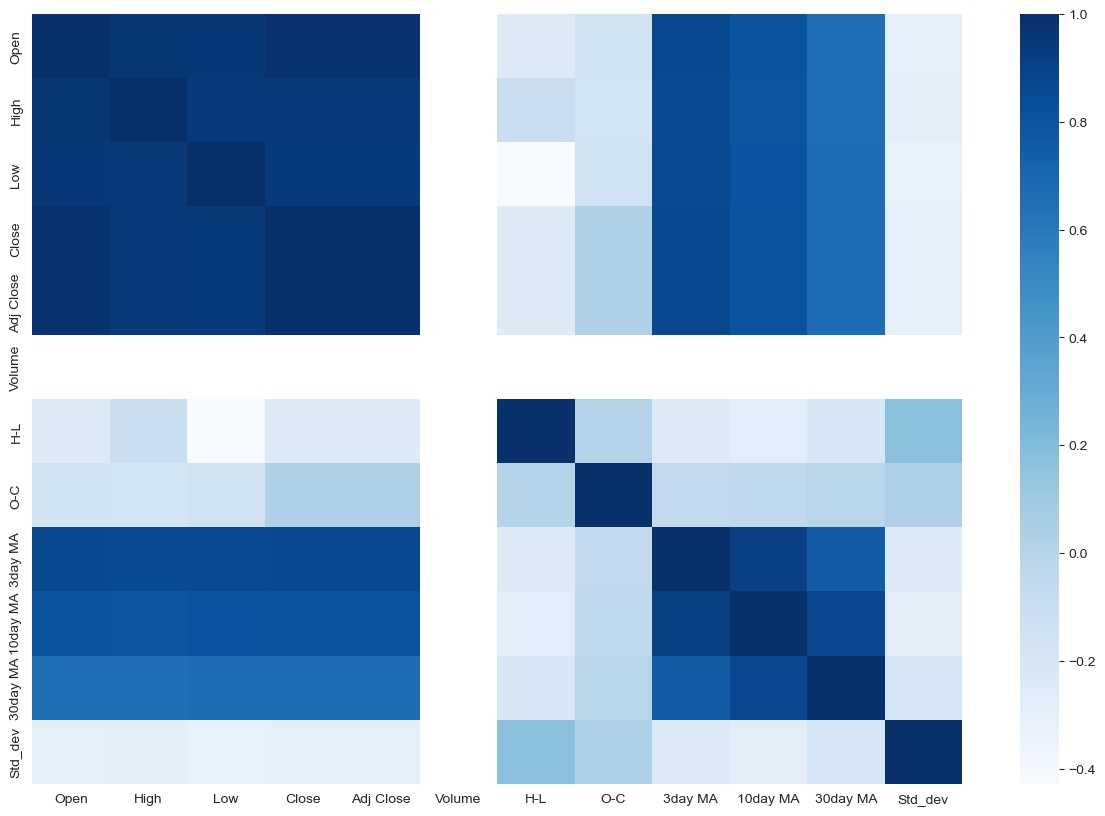

In [75]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,10))
sns.heatmap(df[1:].corr(), cmap='Blues')
plt.show()

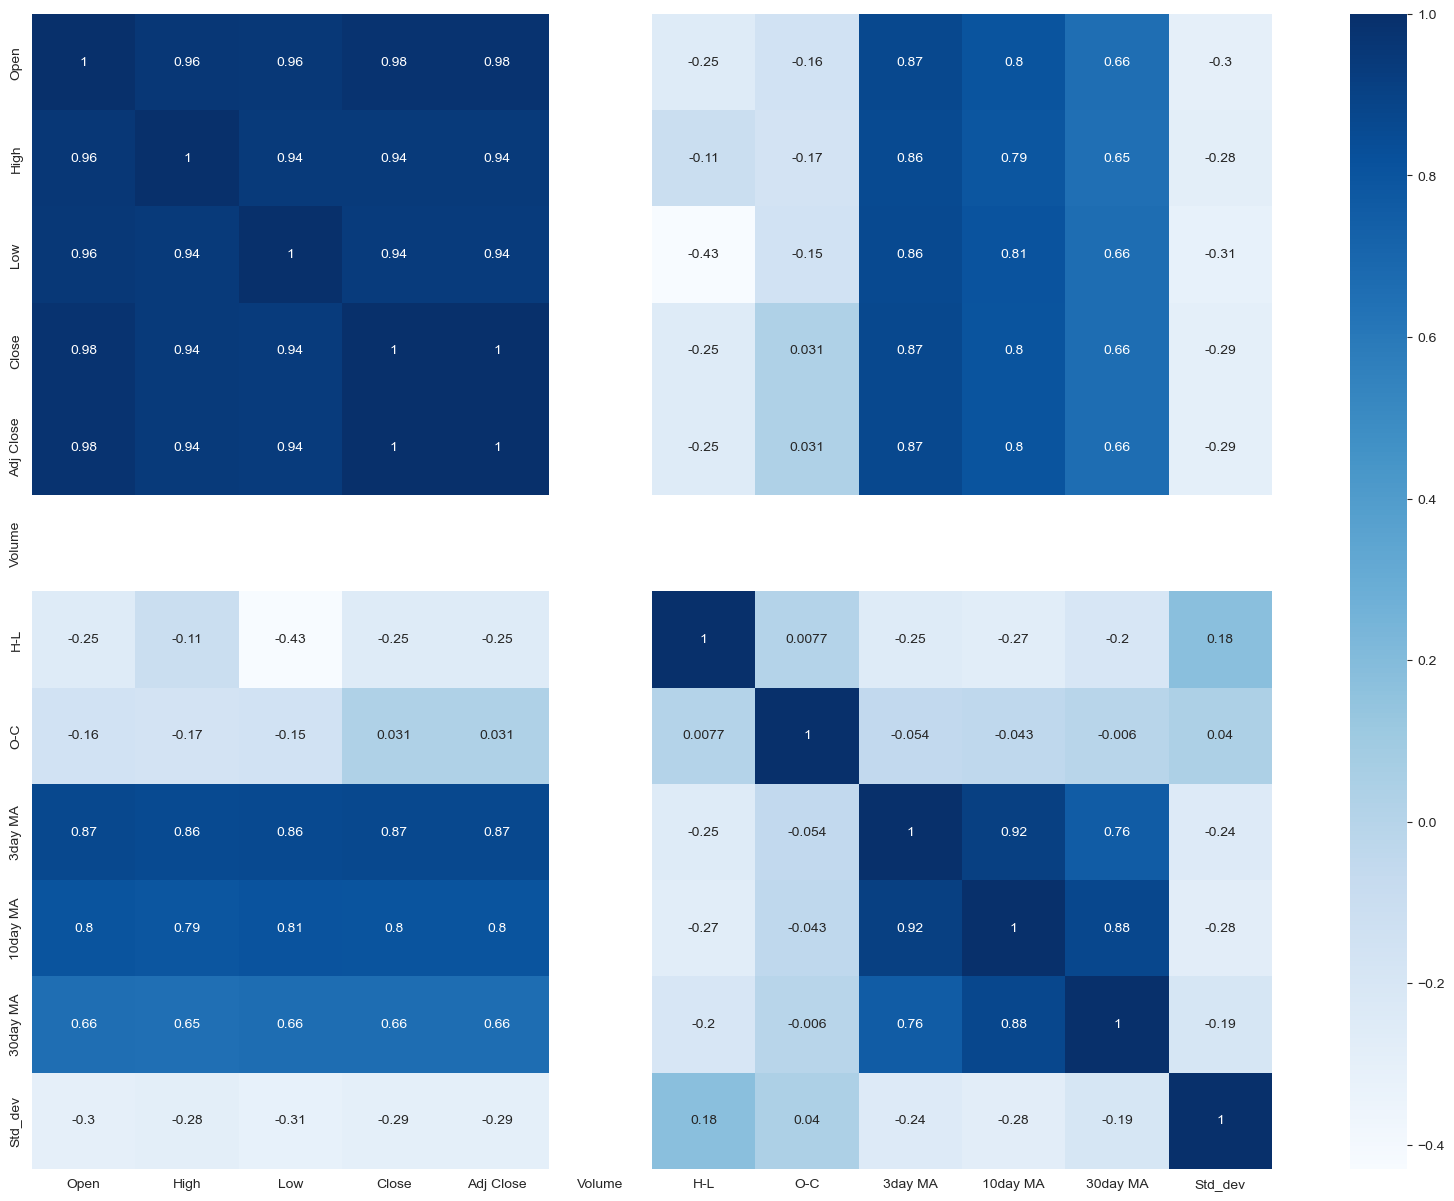

In [76]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 15))
sns.heatmap(df.iloc[:df.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

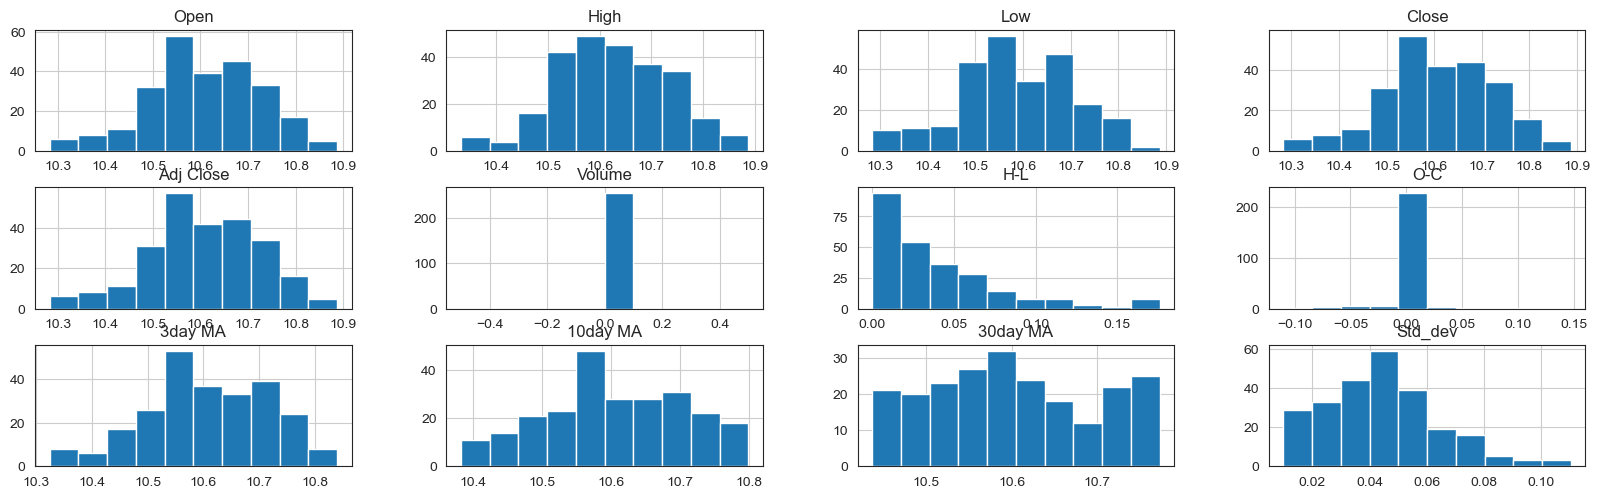

In [77]:
columns_multi = [x for x in list(df.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (20,20)
names = columns_multi
df.hist(layout = (10,4), column = columns_multi)
plt.show()

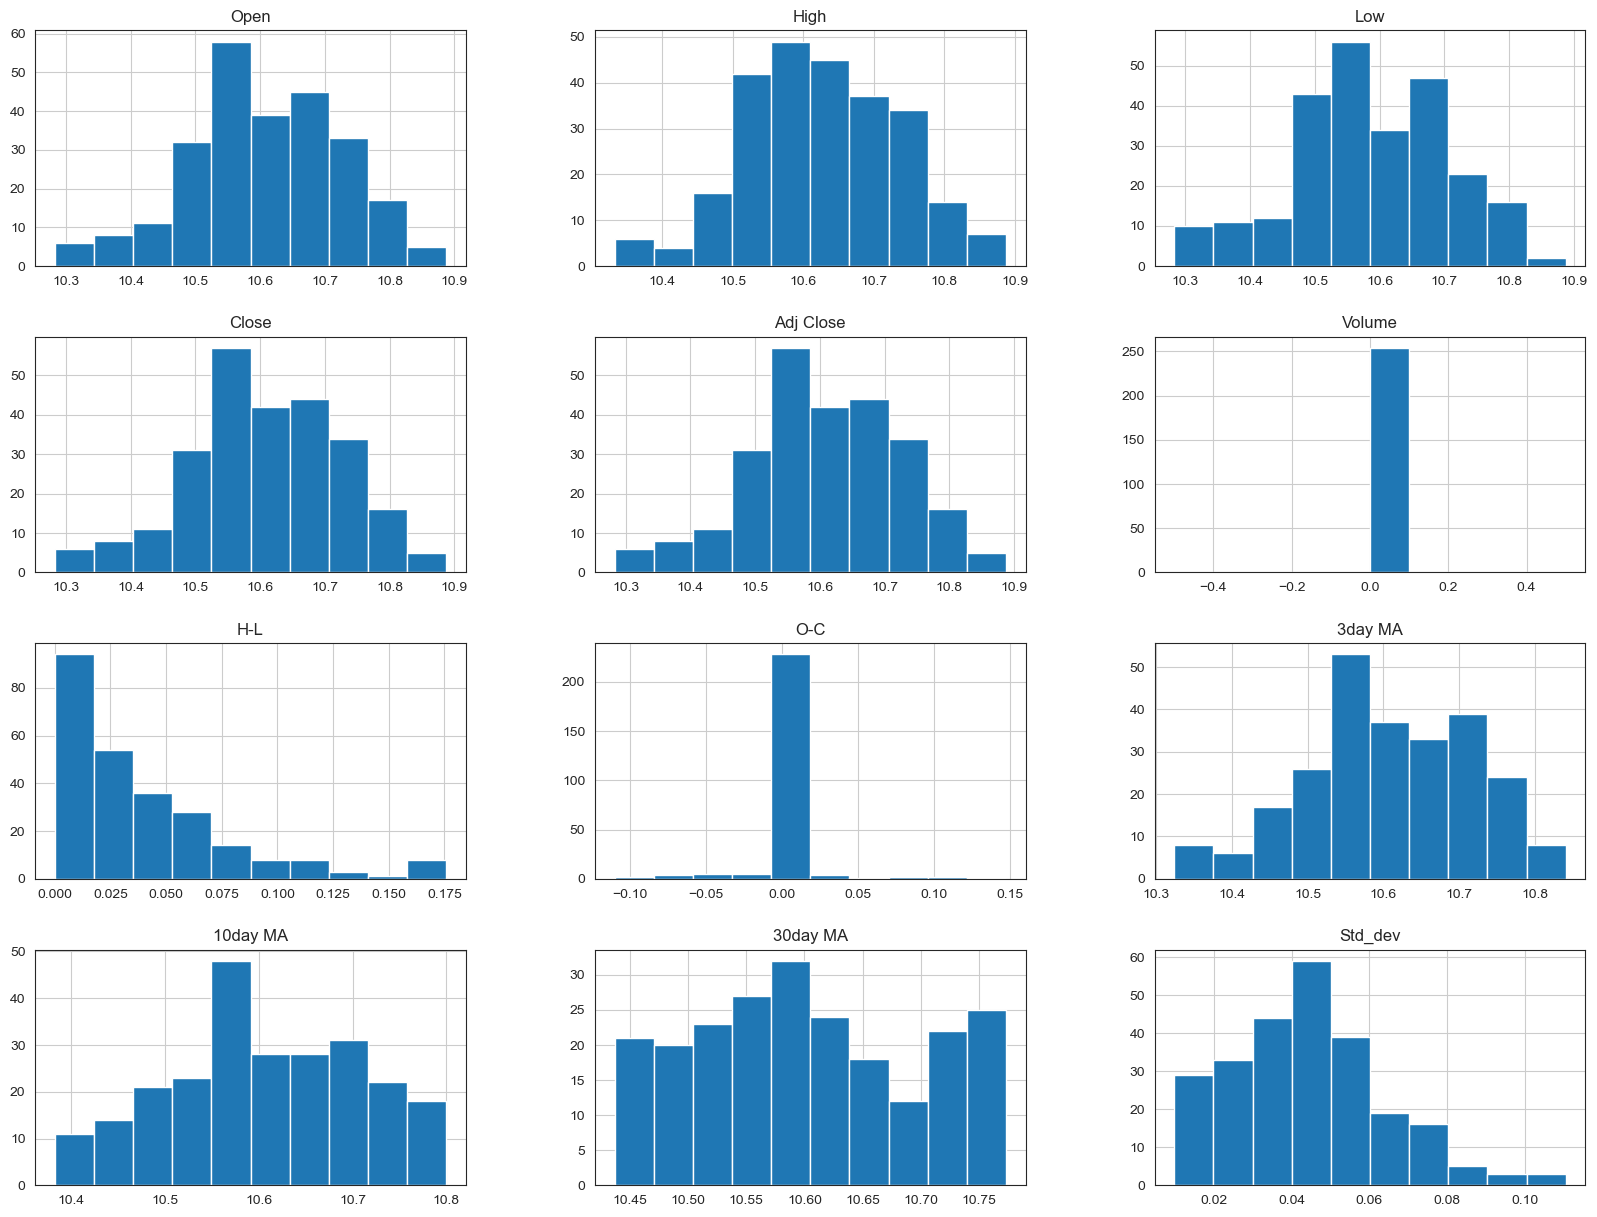

In [78]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

C:\Users\akram\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


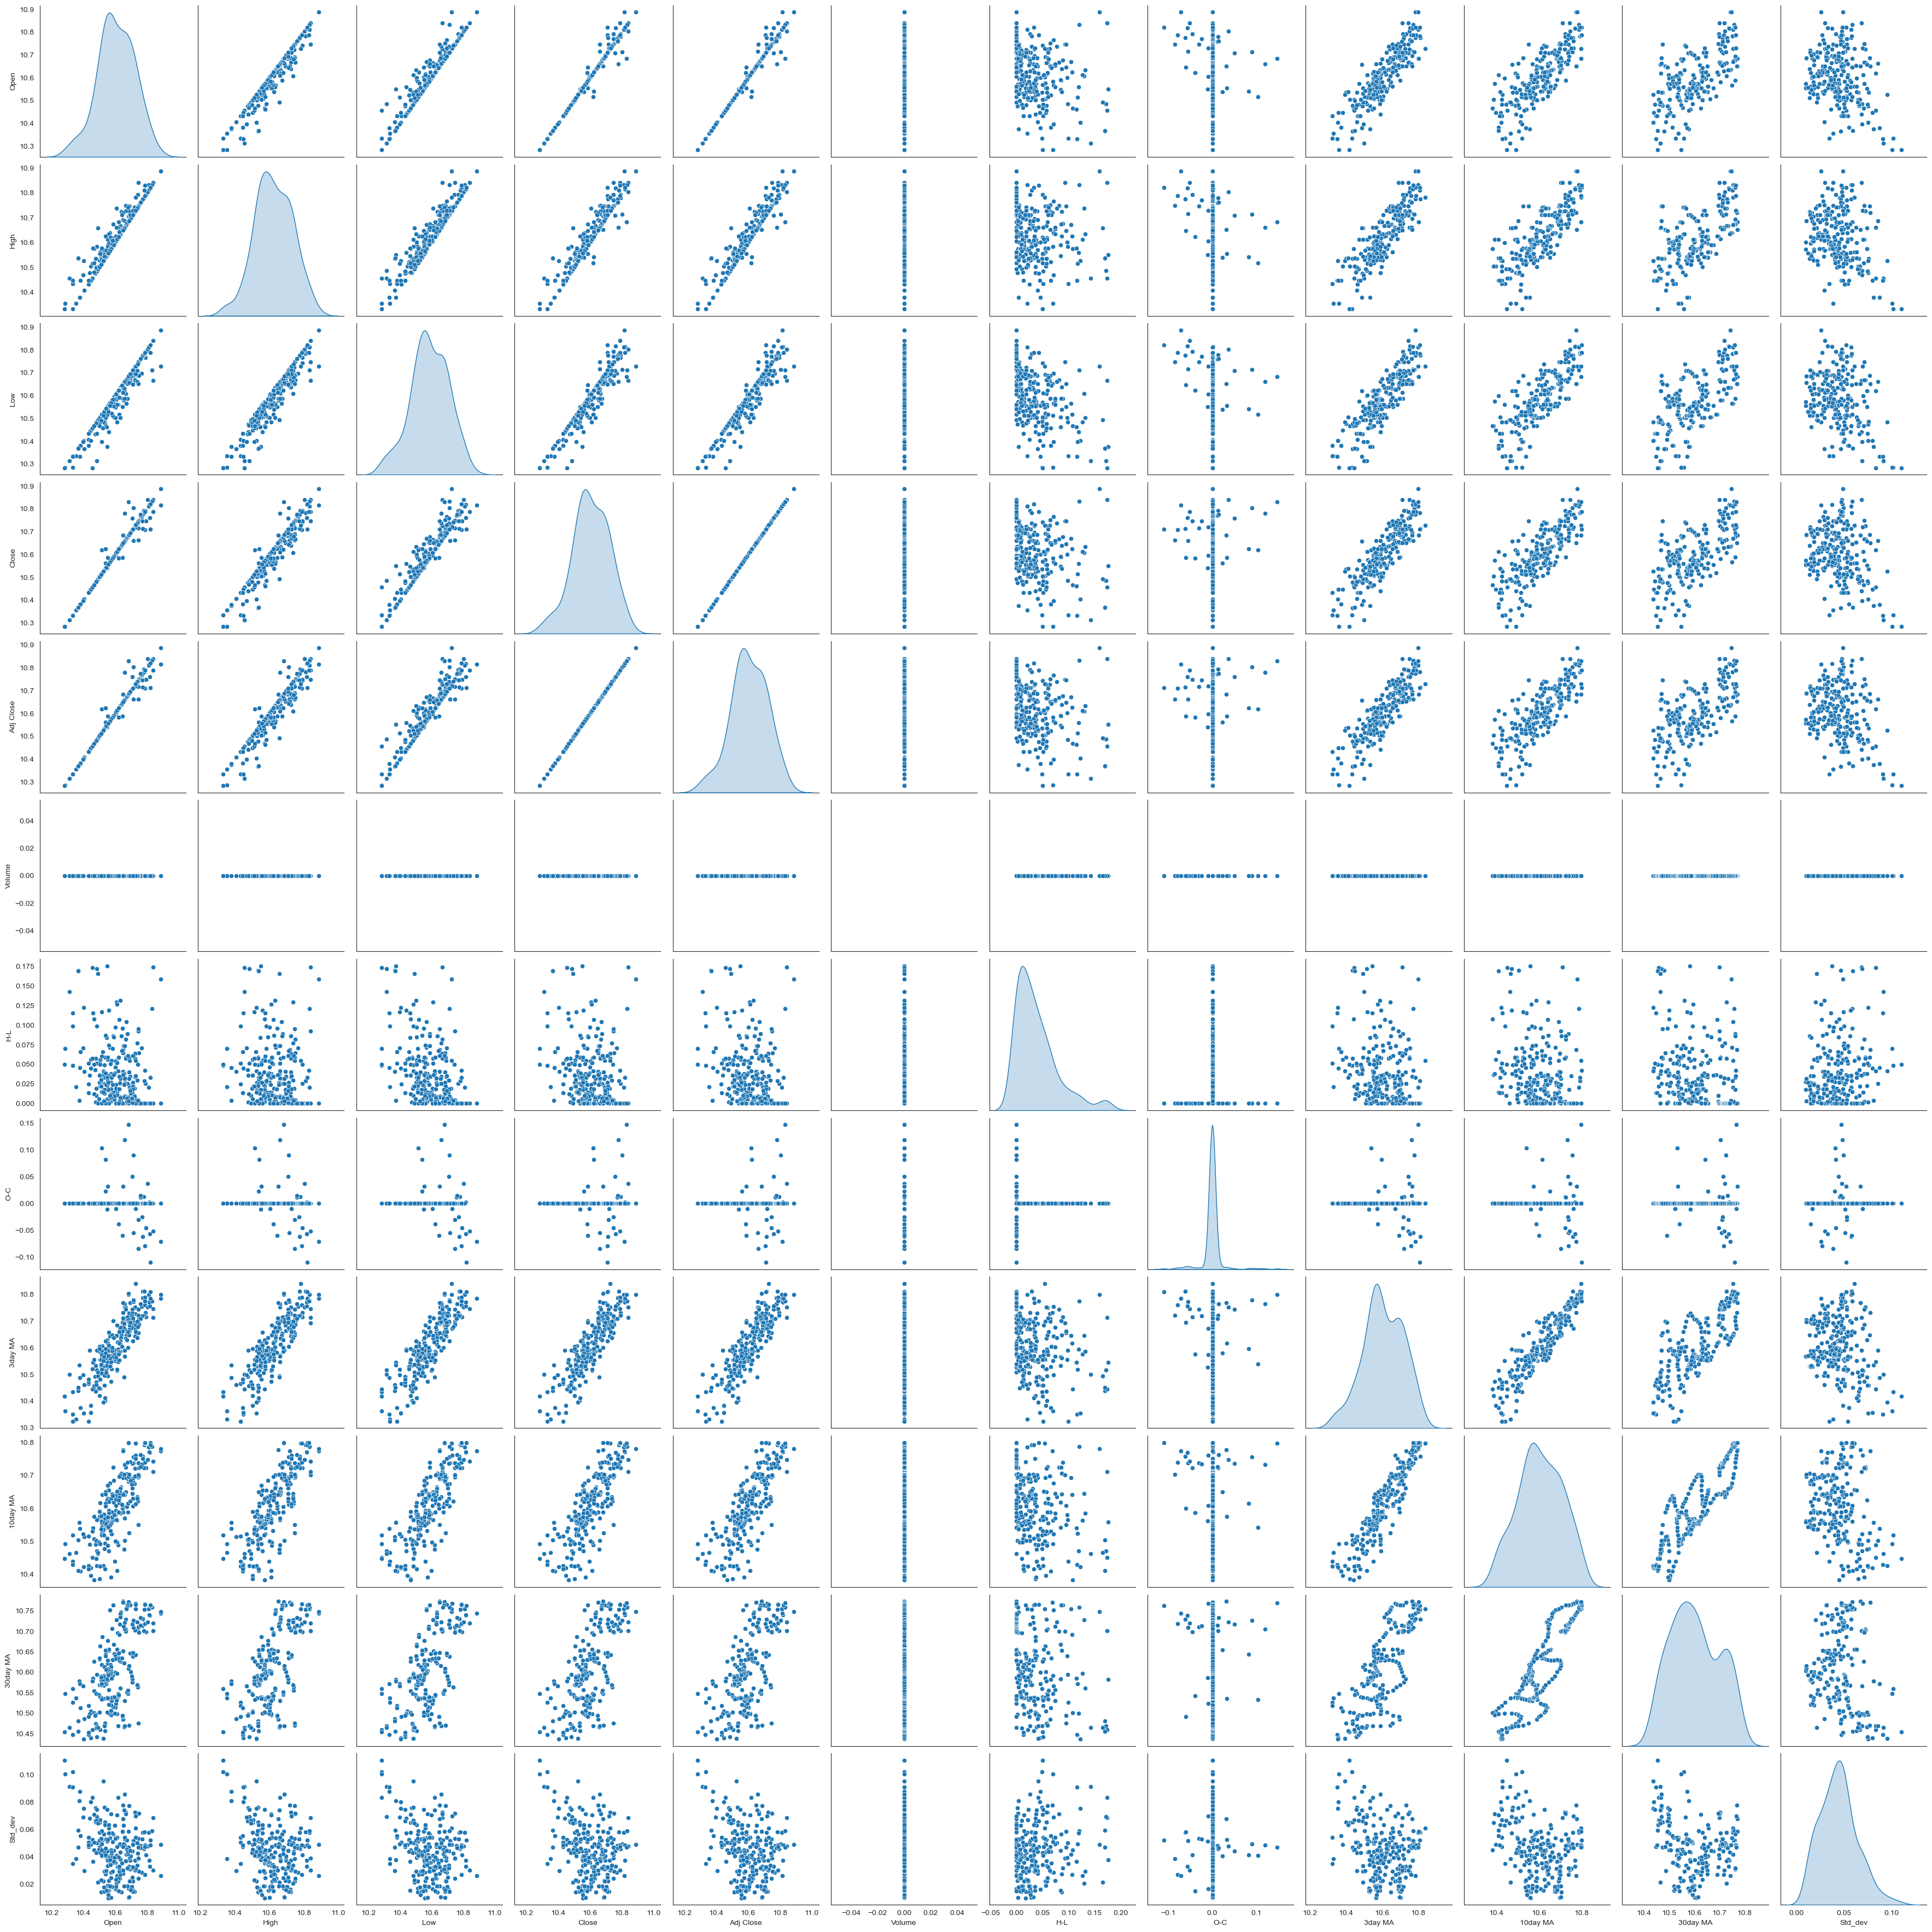

In [80]:
sns.pairplot(df, size=3, diag_kind="kde")
plt.show()